In [131]:
# import packages
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# import the required model elements from keras
from keras import models, layers, optimizers, utils
import tensorflow as tf

In [5]:
# https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python
# loading the dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# printing the shapes of the vectors 
print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


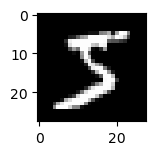

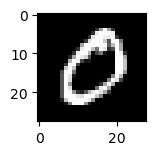

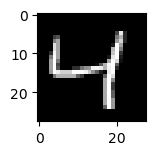

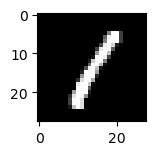

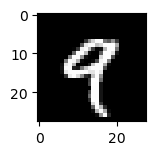

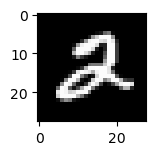

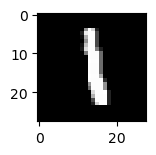

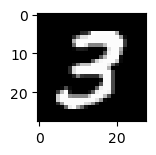

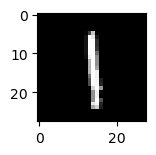

In [7]:
# print some sample data
from matplotlib import pyplot
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    plt.show()


In [14]:
# Try MLP to train & test the data
# tailor the 28 * 28 single input as 784 1-D data
train_x, test_x = train_x.reshape(60000, 784), test_x.reshape(10000, 784)
train_y, test_y = utils.to_categorical(train_y, 10), utils.to_categorical(test_y, 10)

In [117]:
# input portal, it should be 784 * 1, identical to each data record's structure
inputs = layers.Input(shape = (784, ))

# definition of hidden layer
x = layers.Dense(128, activation = 'selu')(inputs)
x = layers.Dense(128, activation = 'selu')(x)
x = layers.Dense(96, activation = 'selu')(x)
x = layers.Dense(64, activation = 'selu')(x)
x = layers.Dense(32, activation = 'selu')(x)



outputs = layers.Dense(10, activation = 'sigmoid')(x)

model = models.Model(inputs = inputs, outputs = outputs)

In [118]:
# performance measuring
model.compile(loss = 'categorical_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])

history = model.fit(train_x, train_y, batch_size = 128, epochs = 10, validation_data = (test_x, test_y))

score = model.evaluate(test_x, test_y)
print(f'Test loss: {score[0]}; test accurracy: {score[1]}')

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.1358 - accuracy: 0.8157 - val_loss: 0.3330 - val_accuracy: 0.9137
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2459 - accuracy: 0.9333 - val_loss: 0.2321 - val_accuracy: 0.9432
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1628 - accuracy: 0.9542 - val_loss: 0.1803 - val_accuracy: 0.9520
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1248 - accuracy: 0.9636 - val_loss: 0.1714 - val_accuracy: 0.9547
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1035 - accuracy: 0.9702 - val_loss: 0.1515 - val_accuracy: 0.9594
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0851 - accuracy: 0.9744 - val_loss: 0.1381 - val_accuracy: 0.9646
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0790 - accuracy: 0.9762 - val_loss: 0.1406 - val_accuracy: 0.9656
Epoch 

In [64]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


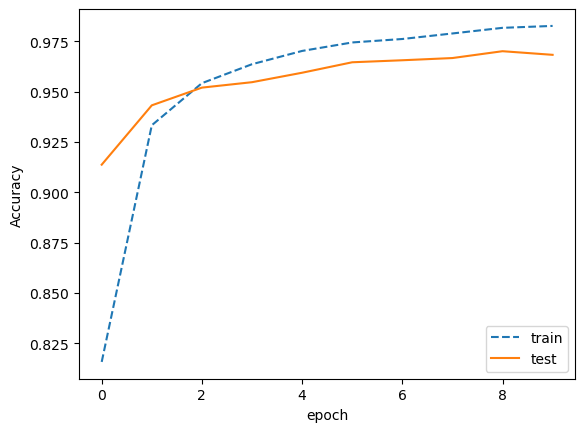

In [119]:
# plotting learning curves
plt.plot(history.history['accuracy'], '--')
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

In [170]:
# By Covolutional Neural Network (CNN)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(60000, 28, 28, 1), x_test.reshape(10000, 28, 28, 1)  # Important !!! the CNN input must be 4D input !!!
y_train, y_test = utils.to_categorical(y_train, 10), utils.to_categorical(y_test, 10)

In [191]:
inputs = layers.Input(shape = (28, 28, 1,))

# conv layer
x = layers.Conv2D(64, kernel_size = (3, 3), activation = 'selu')(inputs)
x = layers.Conv2D(96, (3, 3), activation='selu')(x)
# max pooling
x = layers.MaxPooling2D(pool_size = (2, 2))(x)
x = layers.Dropout(0.1)(x)


# flatten before dense layers
x = layers.Flatten()(x)

# dense layers
x = layers.Dense(128, activation = 'selu')(x)
x = layers.Dense(128, activation = 'selu')(x)
x = layers.Dense(96, activation = 'selu')(x)
x = layers.Dense(64, activation = 'selu')(x)
x = layers.Dense(32, activation = 'selu')(x)


outputs = layers.Dense(10, activation = 'sigmoid')(x)

model_2 = models.Model(inputs = inputs, outputs = outputs)

In [192]:
# performance measuring
model_2.compile(loss = 'categorical_crossentropy', optimizer = 'Nadam', metrics = ['accuracy'])

history = model_2.fit(x_train, y_train, batch_size = 128, epochs = 12, verbose = 1, validation_data = (x_test, y_test))

score = model_2.evaluate(x_test, y_test, verbose = 0)
print(f'Test loss: {score[0]}; test accurracy: {score[1]}')

# Test loss: 0.06671728938817978; test accurracy: 0.9879000186920166


Epoch 1/12
469/469 [==============================] - 88s 183ms/step - loss: 0.2798 - accuracy: 0.9437 - val_loss: 0.0859 - val_accuracy: 0.9739
Epoch 2/12
469/469 [==============================] - 89s 190ms/step - loss: 0.0602 - accuracy: 0.9829 - val_loss: 0.0688 - val_accuracy: 0.9813
Epoch 3/12
469/469 [==============================] - 89s 189ms/step - loss: 0.0437 - accuracy: 0.9872 - val_loss: 0.0590 - val_accuracy: 0.9856
Epoch 4/12
469/469 [==============================] - 96s 205ms/step - loss: 0.0345 - accuracy: 0.9897 - val_loss: 0.0587 - val_accuracy: 0.9835
Epoch 5/12
469/469 [==============================] - 102s 217ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0704 - val_accuracy: 0.9807
Epoch 6/12
469/469 [==============================] - 106s 227ms/step - loss: 0.0285 - accuracy: 0.9916 - val_loss: 0.0738 - val_accuracy: 0.9823
Epoch 7/12
469/469 [==============================] - 105s 224ms/step - loss: 0.0265 - accuracy: 0.9925 - val_loss: 0.0601 - val

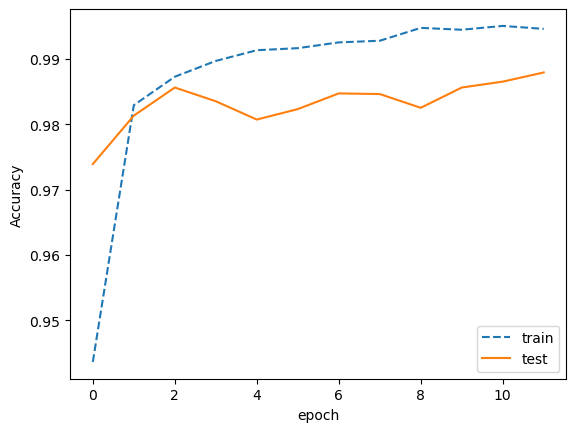

In [193]:
# plotting learning curves
plt.plot(history.history['accuracy'], '--')
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

In [144]:
# Hence, it seems that CNN is better than DNN since it fuses both cov and dense into one network system, adding to the fact that DNN is usually excel in process specific feature while Cov in general feature

Help on Adadelta in module keras.optimizers.optimizer_v2.adadelta object:

class Adadelta(keras.optimizers.optimizer_v2.optimizer_v2.OptimizerV2)
 |  Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07, name='Adadelta', **kwargs)
 |  
 |  Optimizer that implements the Adadelta algorithm.
 |  
 |  Adadelta optimization is a stochastic gradient descent method that is based
 |  on adaptive learning rate per dimension to address two drawbacks:
 |  
 |  - The continual decay of learning rates throughout training.
 |  - The need for a manually selected global learning rate.
 |  
 |  Adadelta is a more robust extension of Adagrad that adapts learning rates
 |  based on a moving window of gradient updates, instead of accumulating all
 |  past gradients. This way, Adadelta continues learning even when many updates
 |  have been done. Compared to Adagrad, in the original version of Adadelta you
 |  don't have to set an initial learning rate. In this version, the initial
 |  learning rate can b